In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

from torch import nn
import torch.nn.functional as F
from torch import optim

import torch
import matplotlib.pyplot as plt

import helper

from torchvision import datasets, transforms


In [16]:
#define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5,0.5),
                                                   (0.5, 0.5, 0.5))
                               ])
#download the training set data
trainset = datasets.FashionMNIST('images/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True)

#download test set data
testset = datasets.FashionMNIST('images/F_MNIST_data/', download=True, train = False, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=64, shuffle=True)

Processing...
Done!


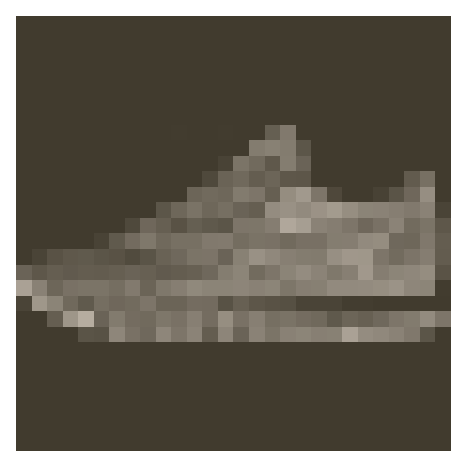

In [17]:
# To see the image
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [18]:
#Define the network architecture
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self, x):
        #flatten the image
        x = x.view(x.shape[0],-1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim = 1)
        
        return x

he training pass is a fairly straightforward process:

1)Make a forward pass through the network to get the logits

2)Use the logits to calculate the loss

3)Perform a backward pass through the network with loss.backward() to calculate the gradients

4)Take a step with the optimizer to update the weights by adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [19]:
#Create network, define optimizer and criterion
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)


In [27]:
#Train the network
epochs = 10

for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        
        output = model(images)
        loss = criterion(output, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f'Training Loss: {running_loss/len(trainloader)}')


Training Loss: 0.30264503720885655
Training Loss: 0.2906582502683978
Training Loss: 0.28120878168038216
Training Loss: 0.27368817785020066
Training Loss: 0.2665044861688797
Training Loss: 0.2605780007472552
Training Loss: 0.2544576186718526
Training Loss: 0.2503478907461741
Training Loss: 0.24531214501557827
Training Loss: 0.23867356491638525


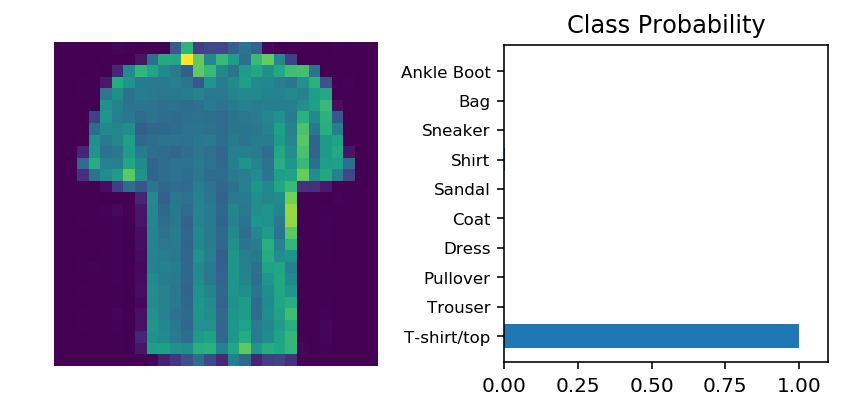

In [32]:
#check the output
images,labels = next(iter(testloader))
img = images[1]


#calculate probabilities (softmax) for img
ps = torch.exp(model(img))

#display the image
helper.view_classify(img, ps,version='Fashion')

In [39]:
#validation and inference
model = Classifier()
images,labels = next(iter(testloader))

ps = torch.exp(model(images))
ps

tensor([[0.0990, 0.1043, 0.0938, 0.0951, 0.0939, 0.0971, 0.1132, 0.0929, 0.1100,
         0.1006],
        [0.0959, 0.1064, 0.0917, 0.0965, 0.0952, 0.0975, 0.1169, 0.0916, 0.1088,
         0.0993],
        [0.0975, 0.1051, 0.0958, 0.0976, 0.0955, 0.0982, 0.1147, 0.0905, 0.1086,
         0.0966],
        [0.0973, 0.1053, 0.0930, 0.0945, 0.0975, 0.0972, 0.1142, 0.0914, 0.1090,
         0.1006],
        [0.0927, 0.1062, 0.0948, 0.0980, 0.0970, 0.1010, 0.1130, 0.0903, 0.1089,
         0.0981],
        [0.0952, 0.1045, 0.0946, 0.0968, 0.0976, 0.0988, 0.1157, 0.0909, 0.1066,
         0.0992],
        [0.0968, 0.1053, 0.0949, 0.0948, 0.0953, 0.0968, 0.1144, 0.0921, 0.1097,
         0.1000],
        [0.0963, 0.1056, 0.0922, 0.0998, 0.0940, 0.0970, 0.1156, 0.0915, 0.1073,
         0.1007],
        [0.0975, 0.1061, 0.0963, 0.0964, 0.0962, 0.0971, 0.1131, 0.0908, 0.1076,
         0.0988],
        [0.0966, 0.1048, 0.0948, 0.0956, 0.0943, 0.0981, 0.1132, 0.0919, 0.1117,
         0.0989],
        [0

In [46]:
top_p, top_class = ps.topk(1, dim=1)


In [58]:
#print(top_p, top_class)

In [52]:
labels.shape

torch.Size([64])

In [54]:
labels

tensor([0, 8, 1, 8, 5, 0, 3, 5, 3, 6, 9, 6, 3, 6, 4, 6, 2, 6, 4, 4, 9, 2, 0, 2,
        7, 1, 5, 6, 0, 1, 1, 8, 8, 1, 4, 0, 7, 5, 5, 5, 3, 4, 3, 4, 6, 8, 5, 3,
        7, 1, 8, 7, 3, 8, 2, 1, 7, 4, 1, 0, 6, 7, 5, 1])

In [56]:
equals = top_class == labels.view(*top_class.shape)

**Exercise**: 

Implement the validation loop below.